## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data_complete = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
len(study_data_complete["Mouse ID"].unique())

249

In [17]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
study_data_complete["Mouse ID"].value_counts().head()

g989    13
b128    10
q787    10
s337    10
q511    10
Name: Mouse ID, dtype: int64

In [12]:
# Optional: Get all the data for the duplicate mouse ID. 
# set the index to the mouse ID

# check the mouse data for ID
study_data_complete.loc[study_data_complete["Mouse ID"] == "g989"].set_index('Mouse ID')

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
g989,0,45.000000,0,Propriva,Female,21,26
g989,0,45.000000,0,Propriva,Female,21,26
g989,5,48.786801,0,Propriva,Female,21,26
g989,5,47.570392,0,Propriva,Female,21,26
g989,10,51.745156,0,Propriva,Female,21,26
g989,10,49.880528,0,Propriva,Female,21,26
g989,15,51.325852,1,Propriva,Female,21,26
g989,15,53.442020,0,Propriva,Female,21,26
g989,20,55.326122,1,Propriva,Female,21,26


In [14]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_Study_Data = study_data_complete[study_data_complete["Mouse ID"].isin(study_data_complete["Mouse ID"].value_counts())==False]

In [19]:
# Checking the number of mice in the clean DataFrame.
len(cleaned_Study_Data["Mouse ID"].unique())

249

## Summary Statistics

In [20]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# series variable to hold Tumor Volume Data grouped by Drug Regimen
grouped_Data = cleaned_Study_Data.groupby("Drug Regimen")
# variable to hold the Mean Tumor Volume Data Grouped by Drug Regimen
mean = grouped_Data["Tumor Volume (mm3)"].mean()

# variable to hold median Tumor Volume Data Grouped by Drug Regimen
median = grouped_Data["Tumor Volume (mm3)"].median()

# variable to hold the Tumor Volume Variance Data Grouped by Drug Regimen
variance = grouped_Data["Tumor Volume (mm3)"].var()

# variable to hold the Tumor Volume Standard Deviation Data Grouped by Drug Regimen
std_dev = grouped_Data["Tumor Volume (mm3)"].std()

# variable to hold the Tumor Volume SEM Data Grouped by Drug Regimen
sem = grouped_Data["Tumor Volume (mm3)"].sem()

# Convert to DataFrame
statistics_Table = pd.DataFrame({
    "Mean Tumor Volume" : mean,
    "Median Tumor Volume" : median,
    "Tumor Volume Variance" : variance,
    "Tumor Volume Standard Deviation" : std_dev,
    "Tumor Volume Standard Error Mean" : sem
})
# Preview DataFrame
statistics_Table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume Standard Error Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [24]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
new_Statistics_Table = cleaned_Study_Data.groupby("Drug Regimen").agg({
    "Tumor Volume (mm3)" : ["mean", "median", "var", "std", "sem"]
})
new_Statistics_Table

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [25]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

# list of unique drug regimens
unique_Drug_Regimens = cleaned_Study_Data["Drug Regimen"].unique()
# drug regimen as x-axis values for plotting
xaxis = unique_Drug_Regimens
# drop all duplicate mice
unique_Mouse_Subset = cleaned_Study_Data.drop_duplicates(subset="Mouse ID", keep="first")

# get mice counts per drug
mouse_Drug_Tally = unique_Mouse_Subset["Drug Regimen"].value_counts()

<AxesSubplot:title={'center':'Mouse COunts by Drug Regimen'}, xlabel='Drug Regimen', ylabel='Mice Count'>

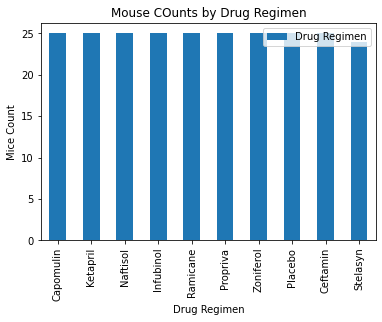

In [29]:
# plot the mouse counts for each drug using pandas
mouse_Drug_Tally.plot.bar(title="Mouse COunts by Drug Regimen", xlabel="Drug Regimen", ylabel="Mice Count", legend=True)

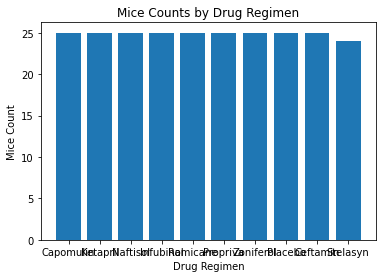

In [30]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
# plot the bar graph of mice count per drug regimen
plt.bar(mouse_Drug_Tally.index.values, mouse_Drug_Tally.values)
plt.title("Mice Counts by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice Count")
plt.show()


<AxesSubplot:title={'center':'Drug Regimen by Sex'}, ylabel='Sex'>

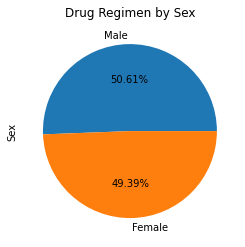

In [37]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_Sex_Tally = cleaned_Study_Data["Sex"].value_counts()
mouse_Sex_Tally.plot(kind='pie', title="Drug Regimen by Sex", autopct="%1.2f%%")

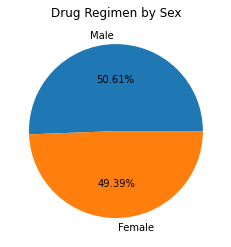

In [39]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mouse_Sex_Tally.values, labels=mouse_Sex_Tally.index.values, autopct="%1.2f%%")
plt.title("Drug Regimen by Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [49]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# set drug regimen as index and drop associated regimens while only keeping Capomulin, Ramicane, Infubinol, and Ceftamin
cleaned_Study_Data.set_index("Drug Regimen", inplace=True)

# isolated view of just capomulin for later use
capomulin = cleaned_Study_Data.loc["Capomulin"]

# Reset index so drug regimen column persists after inner merge
cleaned_Study_Data.reset_index(inplace=True)


# get mouse count per drug
mouse_count_by_drug = cleaned_Study_Data.groupby(by="Drug Regimen").count() ["Mouse ID"]

# Start by getting the last (greatest) timepoint for each mouse
timepoint = cleaned_Study_Data.groupby("Mouse ID")["Timepoint"].max()
timepoint = timepoint.reset_index()


In [48]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_DF = timepoint.merge(cleaned_Study_Data, on = ["Mouse ID", "Timepoint"], how="left")
# show all rows of data
merged_DF

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26
245,z578,45,30.638696,0,Ramicane,Male,11,16
246,z581,45,62.754451,3,Infubinol,Female,24,25
247,z795,45,65.741070,3,Naftisol,Female,13,29


In [51]:
# Put treatments into a list for for loop (and later for plot labels)
#set drugs to be analyzed, colors for the plots, and markers


# Create empty list to fill with tumor vol data (for plotting)
tumor_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drug_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_count = merged_DF.loc[merged_DF["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_list.append(final_tumor_count)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_count.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles [0.75]
    iqr = upperq - lowerq
    lowerbound = lowerq - (1.5 * iqr)
    upperbound = lowerq + (1.5 * iqr)
    outliers = final_tumor_count.loc[(final_tumor_count < lowerbound) | (final_tumor_count > upperbound)]
    
    print(f"Potential outliers for {drug}: {outliers}.")
    

 

Potential outliers for Capomulin: 81     47.685963
163    46.539206
Name: Tumor Volume (mm3), dtype: float64.
Potential outliers for Ramicane: 158    45.220869
Name: Tumor Volume (mm3), dtype: float64.
Potential outliers for Infubinol: 27    72.226731
31    36.321346
Name: Tumor Volume (mm3), dtype: float64.
Potential outliers for Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64).


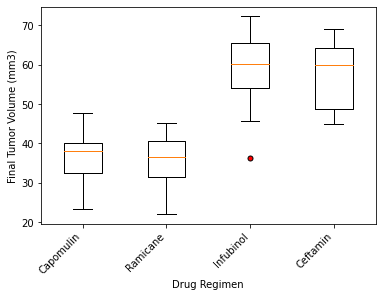

In [54]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
red_out = dict(markerfacecolor="red", markersize=5)

plt.boxplot(tumor_list, labels=drug_list, flierprops=red_out)
plt.xlabel("Drug Regimen")
plt.ylabel("Final Tumor Volume (mm3)")
plt.xticks(rotation=45, ha="right")
plt.show()


## Line and Scatter Plots

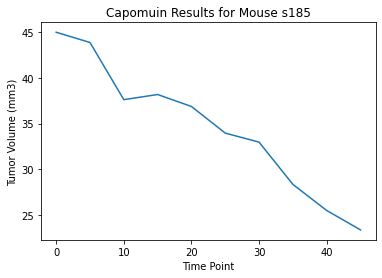

In [59]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_filter = cleaned_Study_Data["Drug Regimen"] == "Capomulin"

#remove other mouse IDs so only s185 shows
mouse_id_filter = cleaned_Study_Data["Mouse ID"] == "s185"
filtered_df = cleaned_Study_Data[capomulin_filter & mouse_id_filter]
#set the x-axis equal to the Timepoint and y-axis to Tumor Volume
plt.plot(filtered_df["Timepoint"], filtered_df["Tumor Volume (mm3)"])
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomuin Results for Mouse s185")
plt.show()

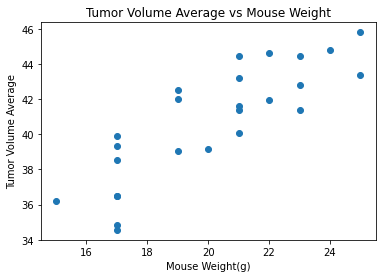

In [61]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
study_data_capomulin_df = cleaned_Study_Data[cleaned_Study_Data["Drug Regimen"] == "Capomulin"]
capomulin_mean_df = study_data_capomulin_df.groupby(by = "Mouse ID").mean() 

plt.scatter(capomulin_mean_df["Weight (g)"], capomulin_mean_df["Tumor Volume (mm3)"])
plt.xlabel("Mouse Weight(g)")
plt.ylabel("Tumor Volume Average")
plt.title("Tumor Volume Average vs Mouse Weight")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84.


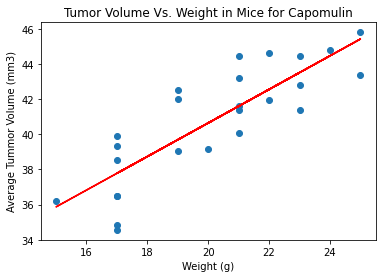

In [63]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = round(st.pearsonr(capomulin_mean_df["Weight (g)"], capomulin_mean_df["Tumor Volume (mm3)"])[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {correlation}.")

model = st.linregress(capomulin_mean_df["Weight (g)"], capomulin_mean_df["Tumor Volume (mm3)"])
y_values = capomulin_mean_df["Weight (g)"] * model[0] + model[1]
plt.scatter(capomulin_mean_df["Weight (g)"], capomulin_mean_df["Tumor Volume (mm3)"])
plt.plot(capomulin_mean_df["Weight (g)"], y_values, color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tummor Volume (mm3)")
plt.title("Tumor Volume Vs. Weight in Mice for Capomulin")
plt.show()
